Replicate Policy Impact in KW94 page 667:
"a 500 dollar per-perod subsidy assuming data set one paramters increases schooling by 1.44 periods"

In [1]:
%matplotlib inline
import json
import numpy as np
import respy as rp

from python.mc_uncertainty_propagation import mc_uncertainty_propagation
from python.model_wrapper import model_wrapper_kw_94
from python.distplot import distplot
from python.convergence_plot import convergence_plot

In [2]:
params, options = rp.get_example_model("kw_94_one", with_data=False)

In [3]:
params['value']

category     name                     
delta        delta                            0.950
wage_a       constant                         9.210
             exp_edu                          0.038
             exp_a                            0.033
             exp_a_square                    -0.050
             exp_b                            0.000
             exp_b_square                     0.000
             hs_graduate                      0.000
             co_graduate                      0.000
             period                           0.000
             is_minor                         0.000
             any_exp_a                        0.000
             work_a_lagged                    0.000
nonpec_a     constant                         0.000
             not_exp_a_lagged                 0.000
             not_any_exp_a                    0.000
             hs_graduate                      0.000
             co_graduate                      0.000
wage_b       constant    

In [4]:
expected_qoi = model_wrapper_kw_94(params["value"].to_numpy())

In [5]:
expected_qoi

1.5417500000000004

In [6]:
with open("json/cov_list.json", "r") as read_file:
    cov_list = json.load(read_file)

cov = np.array(cov_list).reshape(len(params), len(params))

In [7]:
cov

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 2.56e-06, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 2.56e-08, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [8]:
mean_vector = params["value"].to_numpy()


In [9]:
#qoi = mc_uncertainty_propagation(mean_vector, cov, 500, save_json=True)

In [10]:
#qoi_list

In [11]:
with open("json/qoi.json", "r") as read_file:
    qoi = json.load(read_file)

In [12]:
len(qoi)

500

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

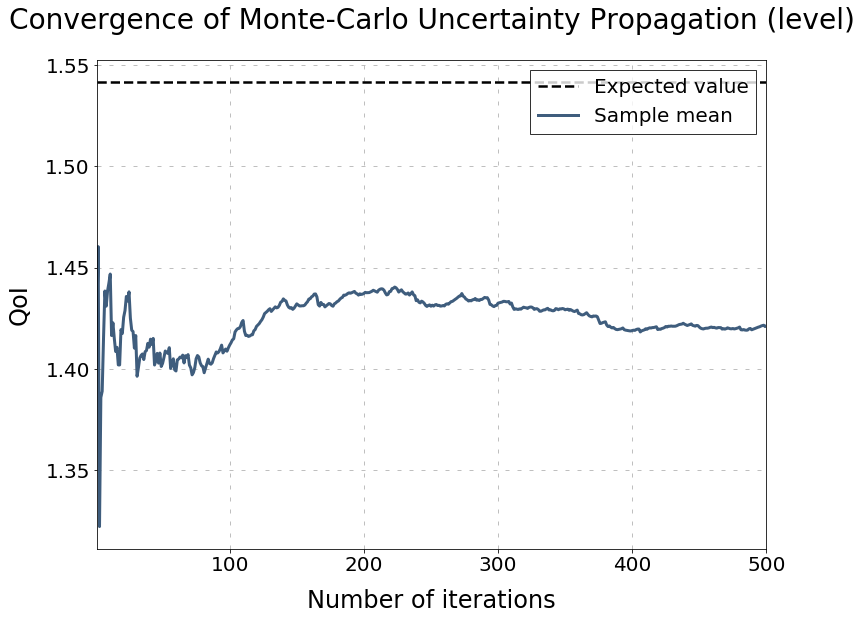

In [13]:
convergence_plot(qoi, expected_qoi, "QoI")

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

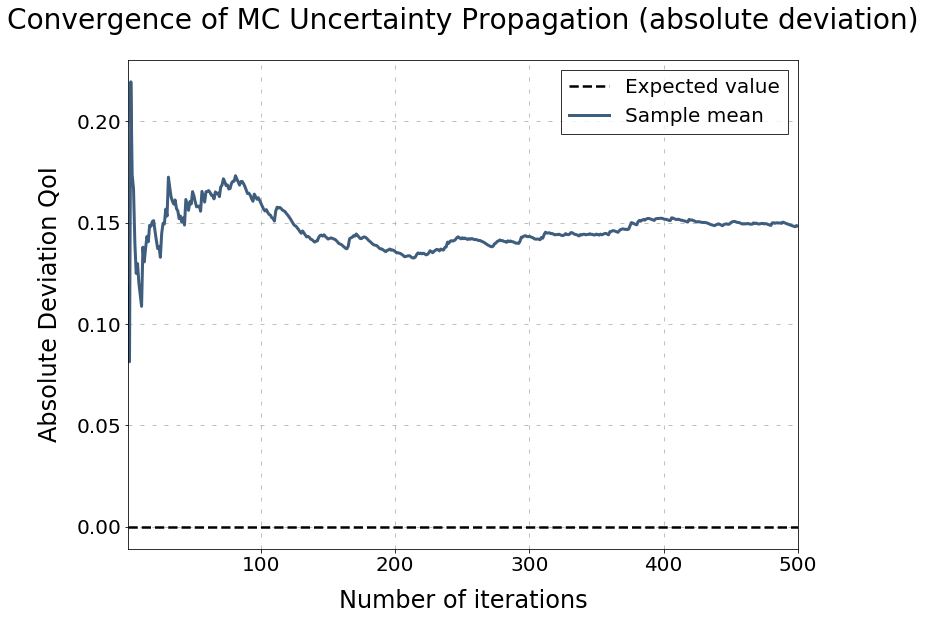

In [14]:
convergence_plot(qoi, expected_qoi, "Absolute Deviation QoI", absolute_deviation=True)

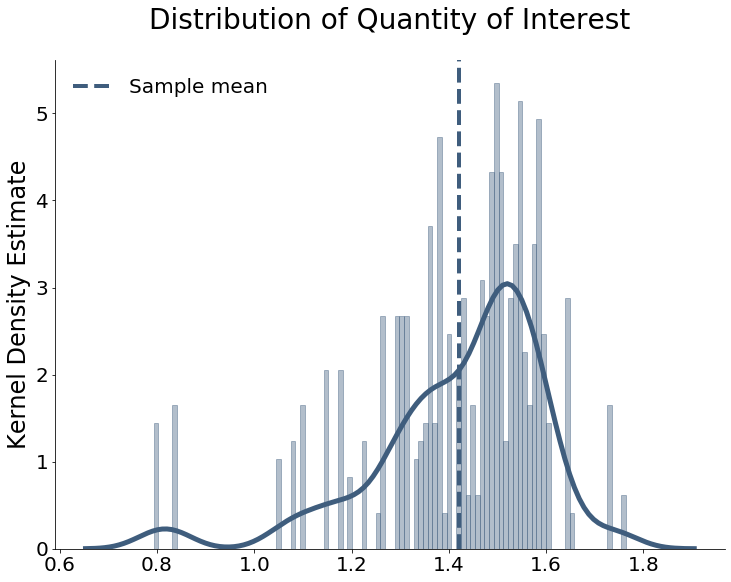

In [15]:
distplot(qoi)